In [ ]:
#import req module
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.models import Sequential

In [ ]:
#prep data: load mnist data
from keras.datasets import mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()
#can check the shape of mnist data
print("Train data shape: ", X_train.shape)
print("Train label shape: ", Y_train.shape)
print("Testing data shape: ", X_test.shape)
print("Testing label shape: ", Y_test.shape)

Train data shape:  (60000, 28, 28)
Train label shape:  (60000,)
Testing data shape:  (10000, 28, 28)
Testing label shape:  (10000,)


In [ ]:
X_train = X_train.reshape(60000, 28*28).astype('float32')/255.0
X_test = X_test.reshape(10000, 28*28).astype('float32')/255.0
Y_train = keras.utils.to_categorical(Y_train, 10)
Y_test = keras.utils.to_categorical(Y_test, 10)

In [ ]:
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [ ]:
Y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [ ]:
model = Sequential()
model.add(layers.Flatten())
model.add(Dense(units=45, input_dim=(28*28), activation='relu'))
model.add(Dense(units=35, activation='relu'))
model.add(Dense(units=24, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_39 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_40 (Dense)             (None, 84)                43092     
_________________________________________________________________
dense_41 (Dense)             (None, 10)                850       
Total params: 445,862
Trainable params: 445,862
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(X_train, Y_train, batch_size=10, epochs=10, validation_split=0.3)

Epoch 1/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0100 - accuracy: 0.9967 - val_loss: 0.1037 - val_accuracy: 0.9774
Epoch 2/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0098 - accuracy: 0.9965 - val_loss: 0.1205 - val_accuracy: 0.9732
Epoch 3/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0097 - accuracy: 0.9967 - val_loss: 0.1092 - val_accuracy: 0.9756
Epoch 4/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0079 - accuracy: 0.9975 - val_loss: 0.1093 - val_accuracy: 0.9772
Epoch 5/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0089 - accuracy: 0.9970 - val_loss: 0.1123 - val_accuracy: 0.9769
Epoch 6/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0067 - accuracy: 0.9976 - val_loss: 0.1080 - val_accuracy: 0.9772
Epoch 7/10
4200/4200 [==============================] - 12s 3ms/step - loss: 0.0072 - accuracy: 0.9973 - val_loss: 0.1199 - val_ac

In [ ]:
loss, accuracy = model.evaluate(X_test, Y_test)
print(f"Test loss: {loss:.3}")
print(f"Test accuracy: {accuracy:.3}")

313/313 [==============================] - 1s 2ms/step - loss: 0.1056 - accuracy: 0.9789
Test loss: 0.106
Test accuracy: 0.979


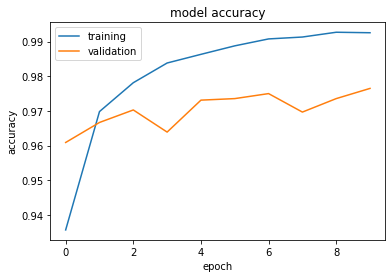

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()

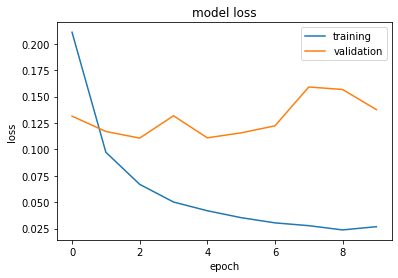

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='best')
plt.show()